In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[1,0] = Sagittal
[0,1] = Frontal

os.chdir('C:\\Users\\smhig\\Jupyter Notebook Projects\\CSI 5140//Project/Data')

if os.path.isdir('Data') is False:
    os.makedirs('Train/Sagittal')
    os.makedirs('Train/Frontal')
    os.makedirs('Valid/Sagittal')
    os.makedirs('Valid/Frontal')
    os.makedirs('Test/Sagittal')
    os.makedirs('Test/Frontal')
    
    for c in random.sample(glob.glob('Sagittal*'), 2000):
        shutil.move(c, 'train/Sagittal')
    for c in random.sample(glob.glob('Frontal*'), 2000):
        shutil.move(c, 'train/Frontal')
    for c in random.sample(glob.glob('Sagittal*'), 800):
        shutil.move(c, 'Valid/Sagittal')
    for c in random.sample(glob.glob('Frontal*'), 800):
        shutil.move(c, 'Valid/Frontal')
    for c in random.sample(glob.glob('Sagittal*'), 200):
        shutil.move(c, 'test/Sagittal')
    for c in random.sample(glob.glob('Frontal*'), 200):
        shutil.move(c, 'test/Frontal')

os.chdir('../../')

In [2]:
train_path: str = 'C:\\Users\\smhig\\Jupyter Notebook Projects\\CSI 5140//Project/Data/train'
valid_path: str = 'C:\\Users\\smhig\\Jupyter Notebook Projects\\CSI 5140//Project/Data/Valid'
test_path: str = 'C:\\Users\\smhig\\Jupyter Notebook Projects\\CSI 5140//Project/Data/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(456,608), classes=['Sagittal', 'Frontal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(456,608), classes=['Sagittal', 'Frontal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(456,608), classes=['Sagittal', 'Frontal'], batch_size=10, shuffle=False)

Found 4000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

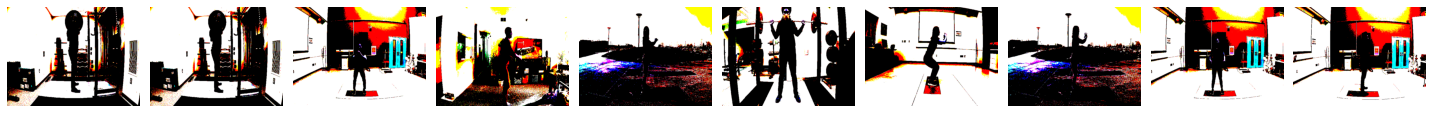

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [6]:
plotImages(imgs)
print(labels)

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(456,608,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(456,608,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [11]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(456,608,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(456,608,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=120,activation='relu'),
    Dense(units=84,activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 456, 608, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 228, 304, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 228, 304, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 114, 152, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1108992)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               133079160 
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
400/400 - 1701s - loss: 6.6405 - accuracy: 0.9490 - val_loss: 0.1834 - val_accuracy: 0.9900
Epoch 2/5
400/400 - 1614s - loss: 0.2478 - accuracy: 0.9902 - val_loss: 0.0636 - val_accuracy: 0.9887
Epoch 3/5
400/400 - 1399s - loss: 0.0567 - accuracy: 0.9927 - val_loss: 0.0944 - val_accuracy: 0.9894
Epoch 4/5
400/400 - 1347s - loss: 0.0372 - accuracy: 0.9962 - val_loss: 0.0523 - val_accuracy: 0.9894
Epoch 5/5
400/400 - 1910s - loss: 0.0167 - accuracy: 0.9983 - val_loss: 0.0474 - val_accuracy: 0.9900


In [15]:
#use model to make prediction
predictions = []
for i in range(len(test_batches)):
    predicted_classes = model.predict(test_batches[i][0])
    predictions.extend(predicted_classes)

predictions = np.argmax(np.round(predictions),axis=1)
#predictions = predictions[:,0]

In [16]:
test_labels = []
for i in range(len(test_batches)):
    labels = test_batches[i][1][:,1]
    test_labels.extend(labels)
test_labels = np.array(test_labels)

In [17]:
test_images = []
for i in range(len(test_batches)):
    images = test_batches[i][0]
    test_images.append(images)
test_images = np.array(test_images)

In [19]:
#results for correct classifications
correct = np.where(predictions==test_labels)[0]
print("Found %d correct labels" % len(correct))

Found 395 correct labels


In [20]:
#results for incorrect classification
incorrect = np.where(predictions!=test_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 5 incorrect labels


198 sagittal pictures classified as sagittal
2 sagittal pictures classified as frontal
3 frontal pictures classified as sagittal
197 frontal pictures classified as frontal


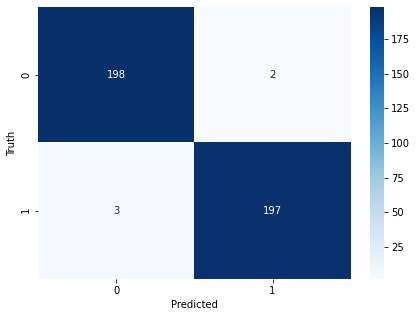

In [23]:
from sklearn.metrics import confusion_matrix
predicted_classes
cm = confusion_matrix(test_labels, predictions)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True,fmt="d",cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('Sag_Fron_Confusion_Matrix.png')
print("%d sagittal pictures classified as sagittal" % cm[0][0])
print("%d sagittal pictures classified as frontal" % cm[0][1])
print("%d frontal pictures classified as sagittal" % cm[1][0])
print("%d frontal pictures classified as frontal" % cm[1][1])

In [24]:
model.save('Image_Class_sagittal_frontal_model_7.tflearn')

INFO:tensorflow:Assets written to: Image_Class_sagittal_frontal_model_7.tflearn\assets
